In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from collections import Counter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import metrics
import graphviz
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
wine = pd.read_csv('C:/Users/joaos/Desktop/Curso Ironhack/Labs/data-labs/module-3/supervised-learning-project/your-code/winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### Analisando a coluna quality:

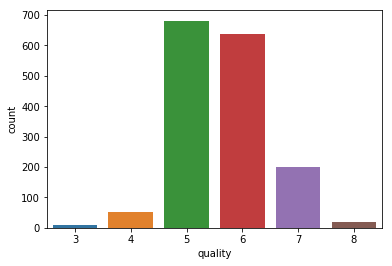

In [7]:
sbn.countplot(x='quality', data=wine)
sbn.set_palette("GnBu_d")

In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

###### Running a Linear Regression model:

In [9]:
x_columns = [col for col in wine.columns.values if col != "quality"]
wine_x = wine[x_columns]
wine_y = wine["quality"]

wine_model = linear_model.LinearRegression()
#create the model
wine_model.fit(wine_x, wine_y)



#score returns the coefficient of determination or r squared. 
#This number tells us what proportion of the variation in the data is explained by the model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

##### Now we print the model coefficients:

In [10]:
wine_model.intercept_

21.96520844944809

In [11]:
wine_model.coef_

array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
       -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
       -4.13653144e-01,  9.16334413e-01,  2.76197699e-01])

In [12]:
wine_model.score(wine_x, wine_y)

0.3605517030386881

0.3605517030386881

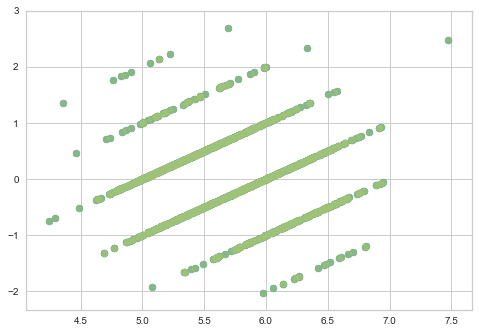

In [13]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(wine_model, hist=False)
visualizer.fit(wine_x, wine_y)  # Fit the training data to the model
visualizer.score(wine_x, wine_y)  

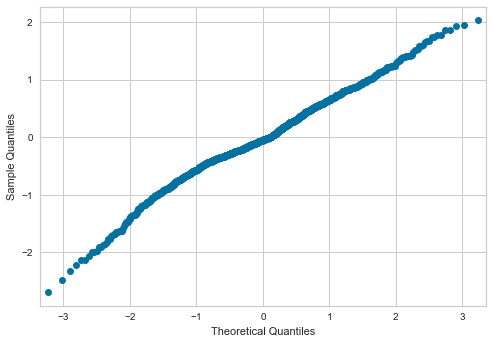

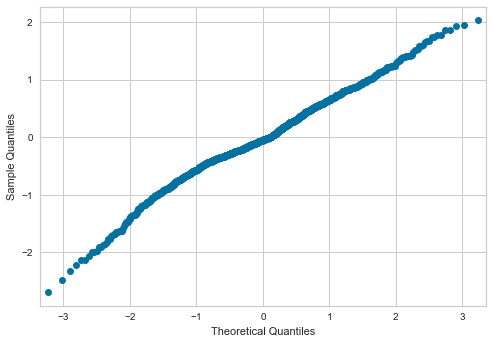

In [14]:
import statsmodels.api as sm

predictions = wine_model.predict(wine_x)
residuals = wine_y - predictions
sm.qqplot(residuals)

#### Logistic Regression
###### Let's create 3 labels according with the wine qualities: 1 - good, 2 - regular, 3 - poor

In [33]:
reviews_label = []
for i in wine['quality']:
    if i >= 1 and i <= 4:
        reviews_label.append('1')
    elif i >= 5 and i <= 6:
        reviews_label.append('2')
    elif i >= 7 and i <= 10:
        reviews_label.append('3')
wine['Labels'] = reviews_label

In [34]:
x_columns = [col for col in wine.columns.values if col != "quality"]
wine_x = wine[x_columns]
wine_y = wine["quality"]
wine_log_model = LogisticRegression()
wine_log_model.fit(wine_x, wine_y)
wine_log_model.score(wine_x, wine_y)

0.7198248905565978

In [35]:
x_columns = [col for col in wine.columns.values if col != "Labels"]
wine_x = wine[x_columns]
wine_y = wine["Labels"]
wine_log_model = LogisticRegression()
wine_log_model.fit(wine_x, wine_y)
wine_log_model.score(wine_x, wine_y)

0.9637273295809882

In [36]:
y_pred_proba = wine_log_model.predict_proba(wine_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(wine_y,  y_pred_proba)
auc = metrics.roc_auc_score(wine_y, y_pred_proba)
plt.plot(fpr,tpr)

ValueError: multiclass format is not supported

#### Decision Trees

In [37]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

In [38]:
tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [39]:
dot_data = export_graphviz(tree,
                out_file = None,
                feature_names = wine.feature_names,
                class_names=wine.target_names,
                rounded = True,
                filled = True)

graph = graphviz.Source(dot_data)
graph.render() 
graph

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Source.gv'], make sure the Graphviz executables are on your systems' PATH